In [1]:
from hashlib import md5
from pathlib import Path

import torchvision.transforms as T
from experiments.dataset import Focus
from tqdm import tqdm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
focus_root = Path("/cmlscratch/pkattaki/datasets/focus")

test_transform = T.Compose(
    [
        T.Resize(224),
        T.CenterCrop(224),
    ]
)

dataset = Focus(
    focus_root,
    categories=list(Focus.categories.keys()),
    times=None,
    weathers=None,
    locations=None,
    transform=None,
)
image_paths = [f[0][1:] for f in dataset.image_files]
print(len(image_paths))

1177


In [3]:
checksums = []
for idx, image_path in enumerate(tqdm(image_paths)):
    with open(Path(focus_root / image_path), "rb") as f:

        checksums.append(md5(f.read()).hexdigest())
print(len(checksums))
print(len(set(checksums)))

100%|██████████| 20815/20815 [06:18<00:00, 54.99it/s]

20815
20815


In [8]:
checksum_dict = {}
for idx, checksum in enumerate(checksums):
    try:
        checksum_dict[checksum].append(idx)
    except KeyError:
        checksum_dict[checksum] = [idx]
keys_to_delete = []
for checksum, indices in checksum_dict.items():
    if len(indices) == 1:
        keys_to_delete.append(checksum)
for key in keys_to_delete:
    del checksum_dict[key]

[1, 7602]
[3, 13822]
[5, 22331]
[10, 231, 427, 3691, 7048, 7845, 15304]
[11, 12996]


dog-indoors/427.jpeg dog-indoors/486.jpeg


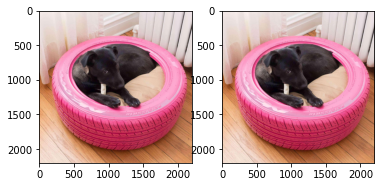

In [21]:
i = 3
j = 13822
print(image_paths[i], image_paths[j])
f, ax = plt.subplots(1, 2)
ax[0].imshow(np.array(Image.open(focus_root / image_paths[i])))
ax[1].imshow(np.array(Image.open(focus_root / image_paths[j])))
plt.show()

In [23]:
with open("duplicates.txt", "w") as f:
    for checksum in checksum_dict:
        for idx in checksum_dict[checksum][1:]:
            f.write(f"{image_paths[idx]}\n")

In [3]:
print(len(dataset.image_files[0]))

5


In [6]:
predictions = np.load("/cmlscratch/pkattaki/void/bg-var/logs/resnet-focus/predictions.npy")
predictions = predictions[:len(image_paths), :]
print(predictions.shape)
with open("misclassifications.txt", "w") as f:
    for idx in range(predictions.shape[0]):
        if predictions[idx, 13] == 0:
            f.write(f"/{image_paths[idx]}\n")
        

(20969, 15)
